<a href="https://colab.research.google.com/github/glima91/mestrado-reconhecimento-de-padroes/blob/main/heuristica_arvore_decisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árvore de Decisão - Atividade

In [1]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

In [2]:
iris = load_iris()
X, y = iris.data[:,2:], iris.target
X[0:10]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1]])

In [3]:
def plotDecisao(modelo, X, y):
    modelo.fit(X, y)
    x0s = np.linspace(np.min(X[:,0])-0.2, np.max(X[:,0])+0.2, 100) 
    x1s = np.linspace(np.min(X[:,1])-0.2, np.max(X[:,1])+0.2, 100) 

    x0, x1 = np.meshgrid(x0s, x1s)
    Xdec = np.c_[x0.ravel(), x1.ravel()]
    ypred = modelo.predict(Xdec)
    plt.contourf(x0, x1, ypred.reshape(x0.shape), alpha=0.55)
    for k in set(y):
        plt.plot(X[:,0][y==k], X[:,1][y==k], 'o', label=f"{iris.target_names[k]} [{k}]")
    plt.xlabel(f"X[0]: {iris.feature_names[0]}")
    plt.xlabel(f"X[1]: {iris.feature_names[1]}")
    plt.show()

In [4]:
# Selecao de atributos utilizando impureza (utilizou gini). Precisamos buscar caracteristicas com menor impureza
def impureza(y): # Gini
    """ Calculo de impureza Gini """
    
    labels = list(set(y))
    labels.sort()
    probabilidades = np.zeros((len(labels),))
    for i,k in enumerate(labels):
        probabilidades[i] = sum(y==k)/len(y)
    result = 1 - sum(probabilidades**2) # 0 => totalmente puro, resultados acima de 0 indica impureza. 
    return result

ytmp = y[:]
valor = impureza(ytmp)
print(valor)


def impurezaValor(x, y, valor):
    maiores = x>valor
    impurezasMaiores = impureza(y[maiores])
    propMaiores = sum(maiores)/len(y)
    impurezasMenores = impureza(y[~maiores])
    propMenores = sum(~maiores)/len(y)
    impurezaTotal = propMaiores*impurezasMaiores + propMenores*impurezasMenores
    return impurezaTotal, impurezasMaiores, impurezasMenores 

0.6666666666666667


In [5]:
# Criacao de heuristica
def melhorValor(x, y):
    result = None
    menorImpureza = float('inf')
    xmax = np.max(x)
    xmin = np.min(x)
    while True:
        valor = (xmin+xmax)/2
        impTotal, impMaiores, impMenores = impurezaValor(x, y, valor)
        if impTotal < menorImpureza:
            menorImpureza = impTotal
            result = valor
            if impMaiores == 0 or impMenores == 0:
                break
            if impMaiores < impMenores:
                xmin = valor
            else:
                xmax = valor
        else:
            break
    return result, menorImpureza

In [6]:
def melhorCaracteristica(X, y):
    impurezas = []
    valores = []
    for caracteristica in range(X.shape[1]):
        valor, imp = melhorValor(X[:, caracteristica], y)
        impurezas.append(imp)
        valores.append(valor)
    impurezas = np.array(impurezas)
    caracteristica = np.argmin(impurezas)
    return caracteristica, valores[caracteristica], impurezas[caracteristica]

In [7]:
# O algoritmo zero R pega os valores mais frequentes de uma classe. E um algoritimo ingênuo

class Arvore(BaseEstimator, ClassifierMixin):
    def fit(self, X, y):
        self.caracteristica, self.valor, self.imp = melhorCaracteristica(X, y)
        maiores = X[:,self.caracteristica] > self.valor
        if sum(maiores) > 0 and sum(~maiores) > 0:
            self.maiores = Arvore()
            self.maiores.fit(X[maiores,:], y[maiores])
            self.menores = Arvore()
            self.menores.fit(X[~maiores,:], y[~maiores])
        else:
            self.resposta = maisFrequente(y)
    def predict(self, X):
        y = np.empty((X.shape[0]))
        if hasattr(self, 'resposta'):
            y[:] = self.resposta
        else:
            maiores = X[:, self.caracteristica] > self.valor
            y[maiores] = self.maiores.predict(X[maiores, :])
            y[~maiores] = self.menores.predict(X[~maiores, :])    
        
        return y

def maisFrequente(y):
    return Counter(y.flat).most_common(1)[0][0]

modelo = Arvore()
modelo.fit(X, y)
ypred = modelo.predict(X)
accuracy_score(y, ypred), (ypred==y)

(0.9933333333333333,
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,

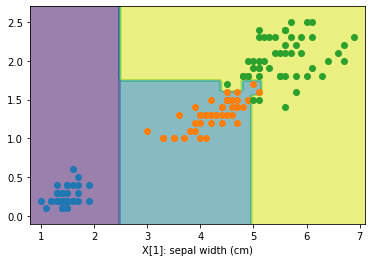

[0.96666667 0.96666667 0.9        0.93333333 1.        ] 0.9533333333333334


In [8]:
from sklearn.model_selection import cross_validate
scores = cross_validate(Arvore(), X, y, cv=5)
plotDecisao(Arvore(), X, y)
print(scores['test_score'], np.mean(scores['test_score']))

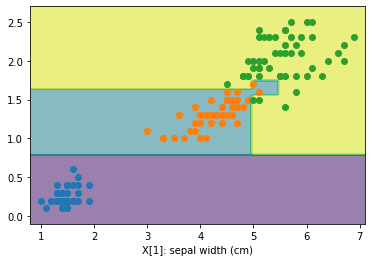

[0.96666667 0.96666667 0.9        0.93333333 1.        ] 0.9533333333333334


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

plotDecisao(DecisionTreeClassifier(), X, y)

cv_results = cross_validate(DecisionTreeClassifier(), X, y, cv=5)
print(cv_results['test_score'], np.mean(cv_results['test_score']))

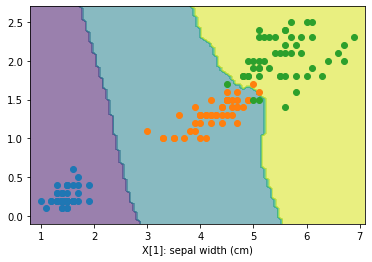

[0.96666667 0.96666667 0.93333333 0.96666667 1.        ] 0.9666666666666668


In [10]:
plotDecisao(KNeighborsClassifier(), X, y)

cv_results = cross_validate(KNeighborsClassifier(), X, y, cv=5)
print(cv_results['test_score'], np.mean(cv_results['test_score']))

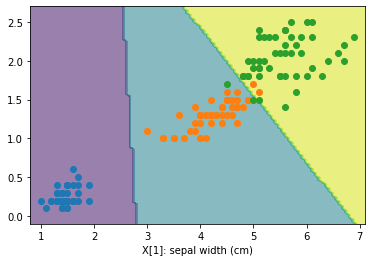

[0.96666667 0.96666667 0.93333333 0.93333333 1.        ] 0.96


In [11]:
plotDecisao(LogisticRegression(), X, y)

cv_results = cross_validate(LogisticRegression(), X, y, cv=5)
print(cv_results['test_score'], np.mean(cv_results['test_score']))

## Comparando com outras bases de dados

In [12]:
from sklearn.datasets import load_wine

wine = load_wine()
X, y = wine.data, wine.target
X[0]

array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
       3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
       1.065e+03])

In [13]:
scores = cross_validate(Arvore(), X, y, cv=3)
print(scores['test_score'], np.mean(scores['test_score']))

[0.78333333 0.86440678 0.89830508] 0.8486817325800377


In [14]:
cv_results = cross_validate(DecisionTreeClassifier(), X, y, cv=3)
print(cv_results['test_score'], np.mean(cv_results['test_score']))

[0.91666667 0.83050847 0.93220339] 0.8931261770244822


In [15]:
cv_results = cross_validate(KNeighborsClassifier(), X, y, cv=3)
print(cv_results['test_score'], np.mean(cv_results['test_score']))

[0.61666667 0.61016949 0.76271186] 0.6631826741996234


In [16]:
cv_results = cross_validate(LogisticRegression(), X, y, cv=3)
print(cv_results['test_score'], np.mean(cv_results['test_score']))

[0.76666667 0.94915254 1.        ] 0.9052730696798493


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [17]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()
X, y = bc.data, bc.target
X[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [18]:
scores = cross_validate(Arvore(), X, y, cv=3)
print(scores['test_score'], np.mean(scores['test_score']))

[0.90526316 0.92631579 0.91534392] 0.9156409542374454


In [19]:
cv_results = cross_validate(DecisionTreeClassifier(), X, y, cv=3)
print(cv_results['test_score'], np.mean(cv_results['test_score']))

[0.88947368 0.93684211 0.89417989] 0.906831894551193


In [20]:
cv_results = cross_validate(KNeighborsClassifier(), X, y, cv=3)
print(cv_results['test_score'], np.mean(cv_results['test_score']))

[0.9        0.94736842 0.92063492] 0.9226677805625174


In [21]:
cv_results = cross_validate(LogisticRegression(), X, y, cv=3)
print(cv_results['test_score'], np.mean(cv_results['test_score']))

[0.93157895 0.96842105 0.93121693] 0.9437389770723104


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Para a base de dados Iris, o algoritimo KNN da biblioteca sklearn obteve acurácia de 96,66%. A arvore de decisão da biblioteca obteve a mesma acurácia que a arvore criada utilizando a heurística (95,33% de acurácia).

Nas bases de dados load_breast_cancer a árvore de decisão da biblioteca sklearn obteve acurácia inferior à árvore de decisão com a heurística, enquanto que para a base de dados load_wine a árvore de decisão da biblioteca sklearn obteve melhor resultado.